<a href="https://colab.research.google.com/github/sibot89/Deep-Learning/blob/main/MNIST_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
my_input = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(16, 3, padding='same', strides=2)(my_input)
bn1 = layers.BatchNormalization()(conv1)
ac1 = layers.Activation('relu')(bn1)
conv2 = layers.Conv2D(32, 3, padding='same', strides=2)(ac1)
bn2 = layers.BatchNormalization()(conv2)
ac2 = layers.Activation('relu')(bn2)
flat = layers.Flatten()(ac2)
out_layer = layers.Dense(10, activation='softmax')(flat)

model = models.Model(my_input, out_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        15,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,682 (80.79 KB)

 Trainable params: 20,586 (80.41 KB)

 Non-trainable params: 96 (384.00 B)

In [5]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001),
              loss=losses.categorical_crossentropy)

In [6]:
history = model.fit(X_train, Y_train, batch_size=128,
                    epochs=50, validation_split=0.2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1.9905 - val_loss: 1.3554
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8978 - val_loss: 0.6485
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6345 - val_loss: 0.5081
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.5202 - val_loss: 0.4403
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4613 - val_loss: 0.3936
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4140 - val_loss: 0.3613
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3807 - val_loss: 0.3353
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3534 - val_loss: 0.3140
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3316 - val_loss: 0.2959
Epoch 10/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3152 - val_loss: 0.2820
Epoch 11/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2969 - val_loss: 0.2689
Epoch 12/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

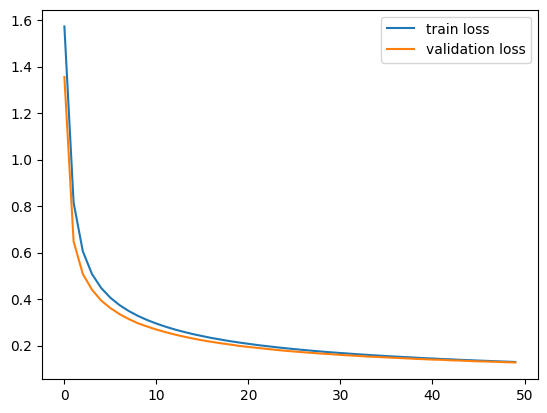

In [7]:
loss_hist = history.history['loss']
val_loss_hist = history.history['val_loss']

plt.plot(loss_hist)
plt.plot(val_loss_hist)
plt.legend(['train loss', 'validation loss'])

In [8]:
test_loss = model.evaluate(X_test, Y_test)
print('test loss:', test_loss)

test_labels_p = model.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1412
test loss: 0.12046102434396744
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


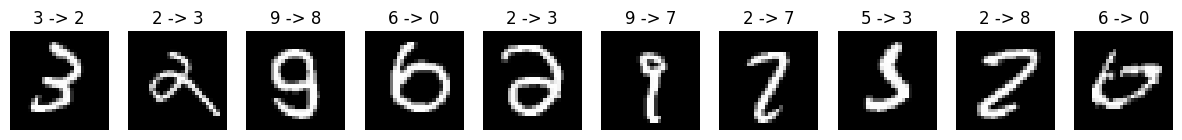

In [9]:
n = 0
f, axs = plt.subplots(1, 10, figsize=(15, 15))
for i in range(len(test_labels)):
  if n >= 10:
    break
  if (test_labels_p[i] != test_labels[i]):
    axs[n].imshow(test_images[i], cmap='gray')
    axs[n].set_title(f"{test_labels[i]} -> {test_labels_p[i]}")
    axs[n].axis('off')
    n = n + 1